---
#CHURN: The Employee Turnover Conundrum
###*Developing a strategic plan for retention*


---
---

   Discovering the underlying issues
   >Pattern identification using:

    *   Decision Trees
    *   Random Forests


Details as of import 2/26/2024
---
---
**(cleaned data github.com/MelAGndy/master/blob/master/churn/employee_stats)*
# *   14,999 Employees sampled
>Salary rates:
>>*   low:  7,316
>>*   medium:  6,446
>>*   high:  1,237
>Job descriptions:
>>*   Accounting:  767
>>*   HR:  739
>>*   Marketing:  858
>>*   Management:  630
>>*   Product Manager:  902
>>*   R&D:  787
>>*   Sales:  4,140
>>*   Support:  2,229
>>*   Technical:  2,720

# Imports

In [1]:
!pip install pandas-profiling
#[notebook]
# !jupyter nbextension enable --py widgetsnbextension

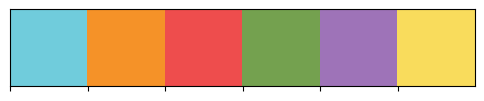

In [28]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
kats_palette = ListedColormap(['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c'])
import seaborn as sns
#html color codes
kats = ['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c']
sns.palplot(sns.color_palette(kats))


warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
employee_eval = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn_ Desicion_Tree_Random_Forest/employee_stats.csv')

In [5]:
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,low
1,0.80,0.86,5,262,6,0,1,0,Sales,medium
2,0.11,0.88,7,272,4,0,1,0,Sales,medium
3,0.72,0.87,5,223,5,0,1,0,Sales,low
4,0.37,0.52,2,159,3,0,1,0,Sales,low


In [50]:
# # @title salary vs satisfaction_level
# figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
# plt.figure(figsize=figsize)

# # Use the custom color palette directly in the violinplot function
# sns.violinplot(employee_eval, x='satisfaction_level', y='salary', inner='box', palette=kats)
# sns.despine(top=True, right=True, bottom=True, left=True)

# # Show the plot
# plt.show()

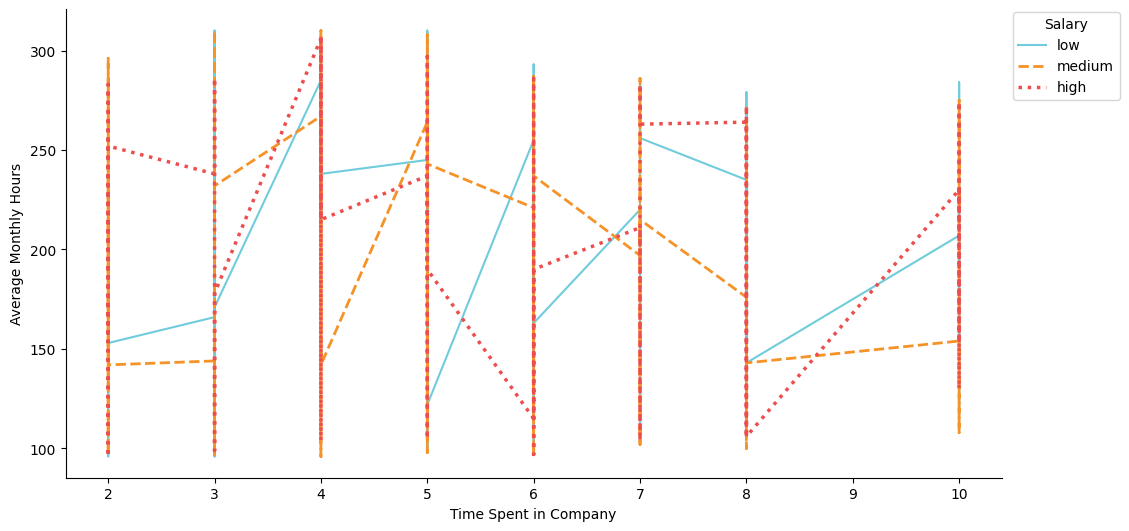

In [48]:
# Function to plot series with varied size and shape
def _plot_series_with_varied_style(series, series_name, palette, ax, line_width, line_style):
    xs = series['time_spend_company']
    ys = series['average_montly_hours']
    ax.plot(xs, ys, label=series_name, color=palette, linewidth=line_width, linestyle=line_style)

# Create a constrained layout figure
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Sort the dataframe by 'time_spend_company'
df_sorted = employee_eval.sort_values('time_spend_company', ascending=True)

# Plot each series with varied size and shape
line_styles = ['solid', 'dashed', 'dotted']  # Define line styles
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
    line_width = 1.5 + i * 0.5  # Vary line width
    line_style = line_styles[i % len(line_styles)]  # Cycle through line styles
    _plot_series_with_varied_style(series, series_name, kats_palette[i], ax, line_width, line_style)

# Add legend outside the loop
fig.legend(title='Salary', bbox_to_anchor=(1, 1), loc='upper left')

# Remove spines
sns.despine()

# Set axis labels
plt.xlabel('Time Spent in Company')
plt.ylabel('Average Monthly Hours')

# Show plot
plt.show()


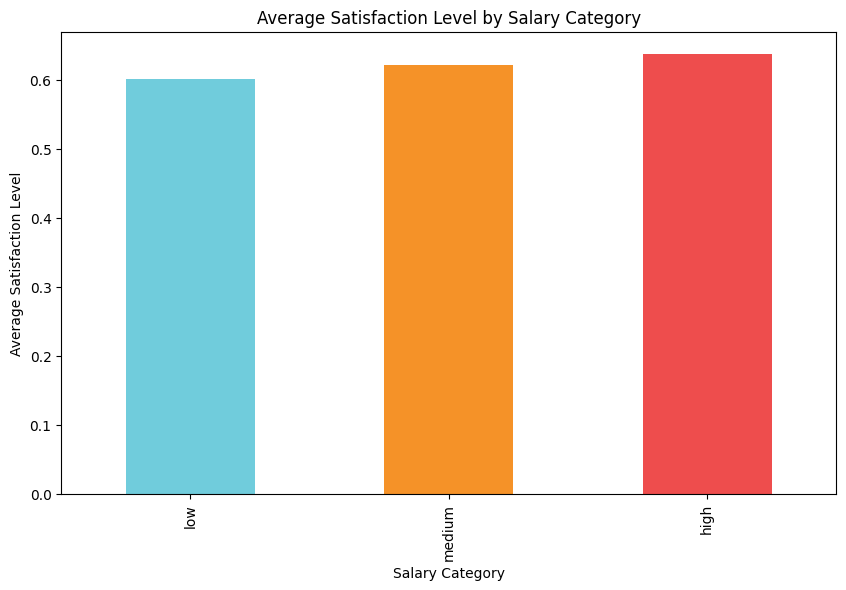

In [73]:
# Calculate the average satisfaction level for each salary category
avg_satisfaction = employee_eval.groupby('salary')['satisfaction_level'].mean()

# Define the colors for each salary category
colors = [kats_palette[0], kats_palette[1], kats_palette[2]]

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_satisfaction.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Salary Category')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Salary Category')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

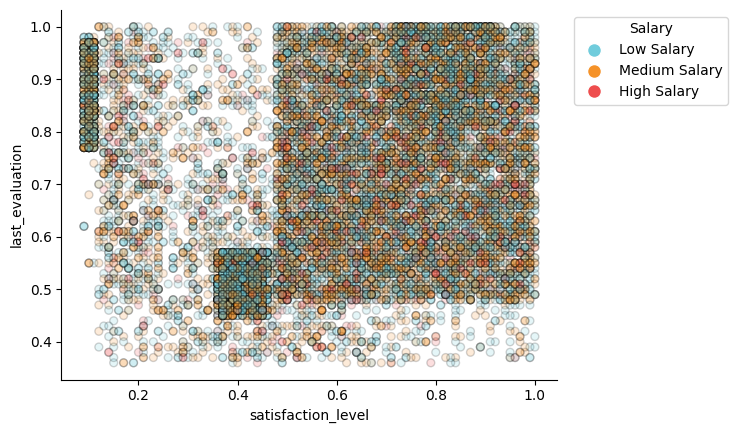

In [65]:
# # Define a dictionary mapping salary categories to colors
# salary_colors = {
#     'low': kats_palette[0],
#     'medium': kats_palette[1],
#     'high': kats_palette[2]
# }

# # Map the salary categories to colors for each data point
# colors = employee_eval['salary'].map(salary_colors)

# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Scatter plot code with colors mapped by salary categories
# scatter_plot = employee_eval.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=0.175, c=colors)

# # Hide top and right spines
# plt.gca().spines[['top', 'right']].set_visible(False)

# # Create custom legend outside the plot
# legend_labels = ['Low Salary', 'Medium Salary', 'High Salary']
# legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in salary_colors.items()]
# plt.legend(handles=legend_handles, labels=legend_labels, title='Salary', loc='upper left', bbox_to_anchor=(1.02, 1))

# # Show the plot
# plt.show()


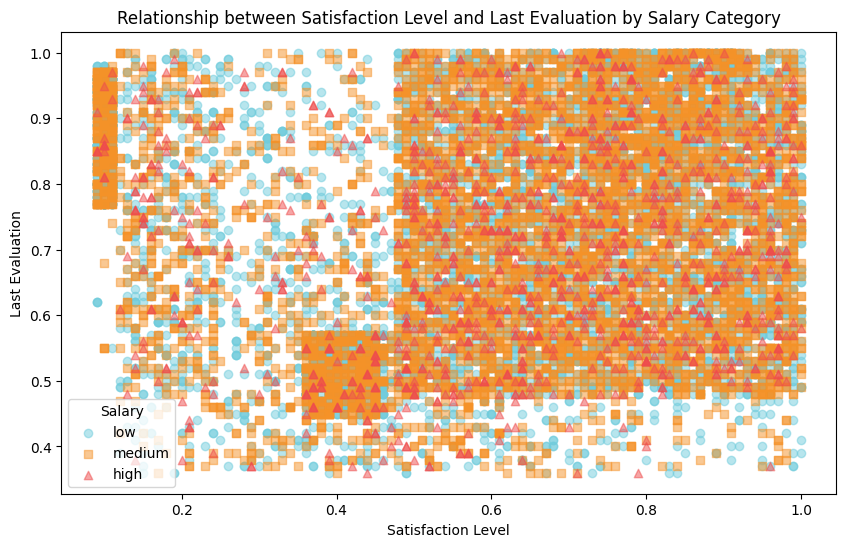

In [74]:
# Define a dictionary mapping salary categories to markers
salary_markers = {
    'low': 'o',
    'medium': 's',
    'high': '^'
}

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each salary category and plot the corresponding points
for salary, group in employee_eval.groupby('salary'):
    plt.scatter(group['satisfaction_level'], group['last_evaluation'], label=salary, marker=salary_markers[salary], color=salary_colors[salary], alpha=0.5)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Relationship between Satisfaction Level and Last Evaluation by Salary Category')

# Add legend
plt.legend(title='Salary')

# Show the plot
plt.show()

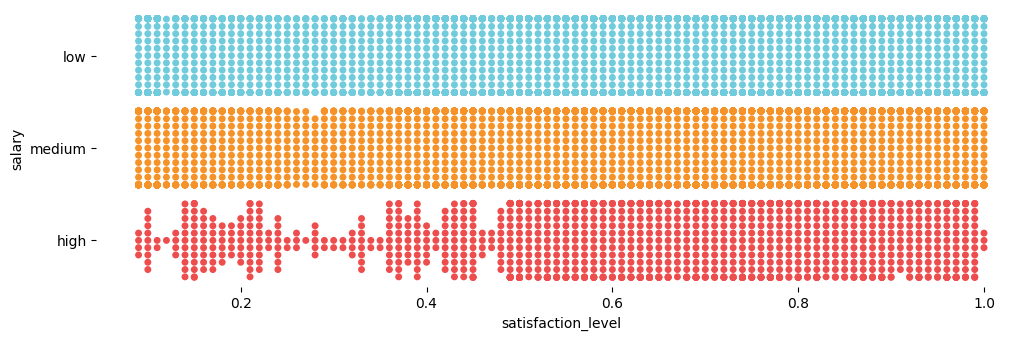

In [7]:
figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
plt.figure(figsize=figsize)
sns.swarmplot(data=employee_eval, x='satisfaction_level', y='salary', palette=kats)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [77]:
employee_eval.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [80]:
plt.rcParams['figure.figsize'] = (12,8)

<Figure size 1000x600 with 0 Axes>

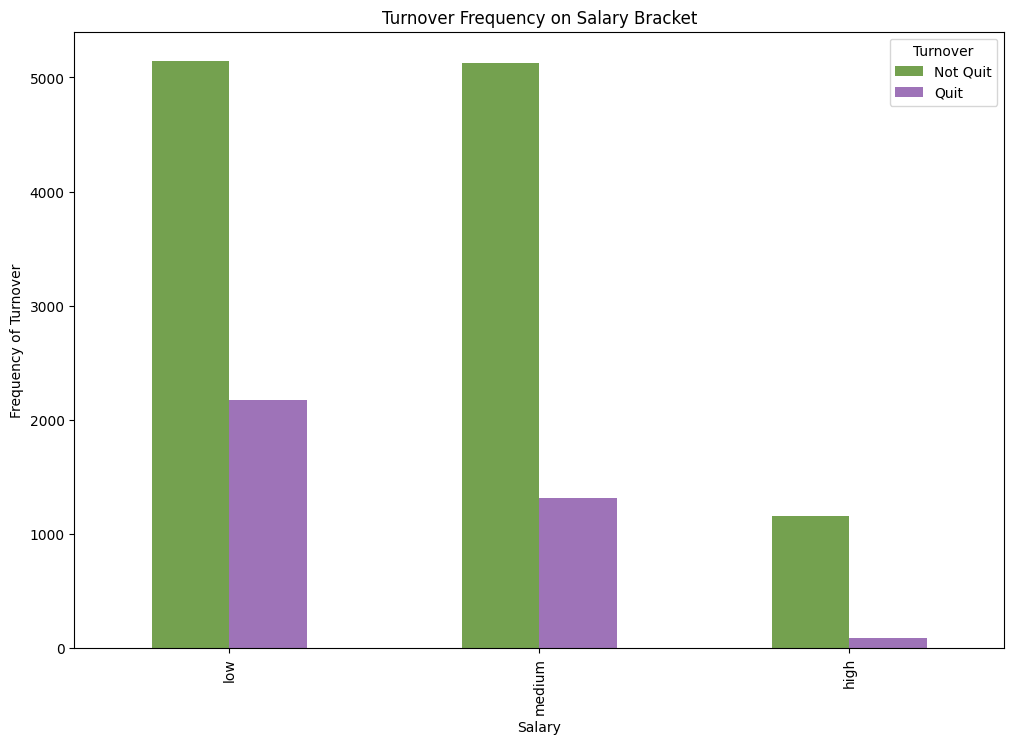

In [82]:
# Define a dictionary mapping salary categories to colors
salary_colors = {
    'low': kats_palette[3],
    'medium': kats_palette[4],
    'high': kats_palette[5]
}

# Map the salary categories to colors for each data point
colors = employee_eval['salary'].map(salary_colors)

# Set the figure size
plt.figure(figsize=(10, 6))

# Use kats_palette for the bar chart
sns.set_palette([salary_colors['low'], salary_colors['medium'], salary_colors['high']])

# Create a bar chart using crosstab
ct = pd.crosstab(employee_eval.salary, employee_eval.quit)
ct.plot(kind='bar')

# Set labels and title
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')

# Add legend
plt.legend(['Not Quit', 'Quit'], title='Turnover')

# Show the plot
plt.show()


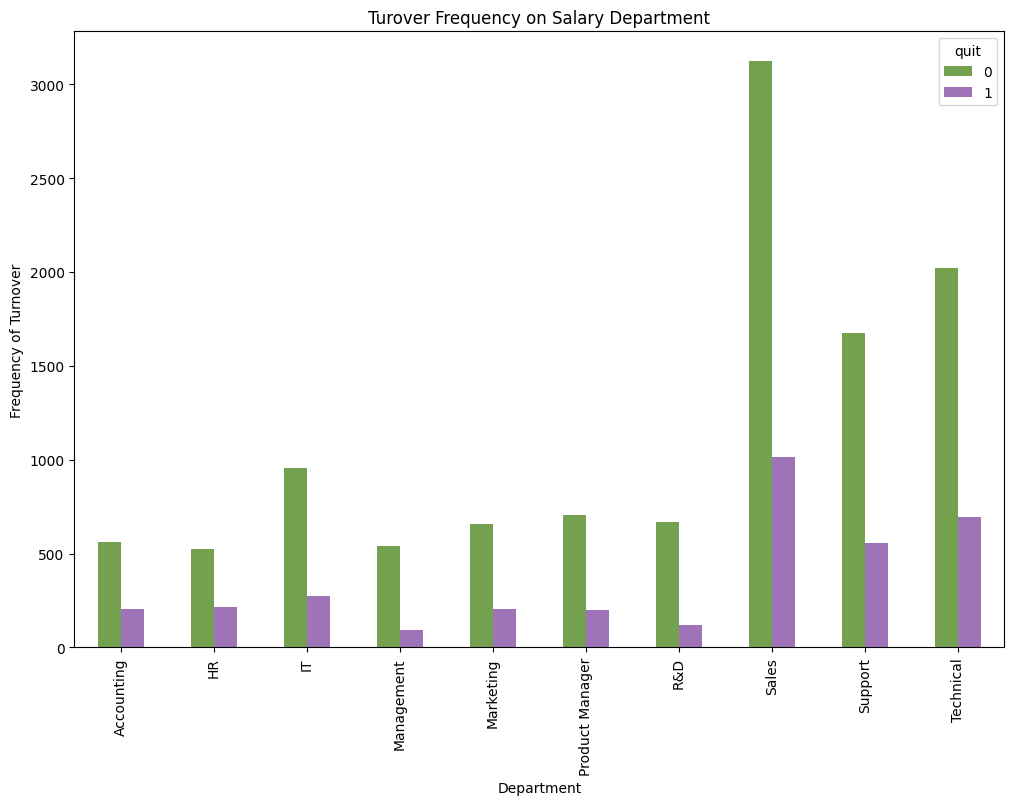

In [83]:
pd.crosstab(employee_eval.department, employee_eval.quit).plot(kind='bar')
plt.title('Turover Frequency on Salary Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

categorizing the variables.

In [84]:
cat_vars = ['department', 'salary']
for var in cat_vars:
  cat_list = pd.get_dummies(employee_eval[var], prefix=var)
  employee_eval = employee_eval.join(cat_list)

In [85]:
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_Management,department_Marketing,department_Product Manager,department_R&D,department_Sales,department_Support,department_Technical,salary_low,salary_medium,salary_high
0,0.38,0.53,2,157,3,0,1,0,Sales,low,...,0,0,0,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,Sales,medium,...,0,0,0,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,Sales,medium,...,0,0,0,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,Sales,low,...,0,0,0,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,Sales,low,...,0,0,0,0,1,0,0,1,0,0


In [87]:
employee_eval.drop(columns = ['department', 'salary'], axis = 1, inplace = True)

KeyError: "['department', 'salary'] not found in axis"

In [89]:
from yellowbrick.target import ClassBalance
plt.style.use("kats")
plt.rcParams['figure.figsize'] = (10,6)

OSError: 'kats' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

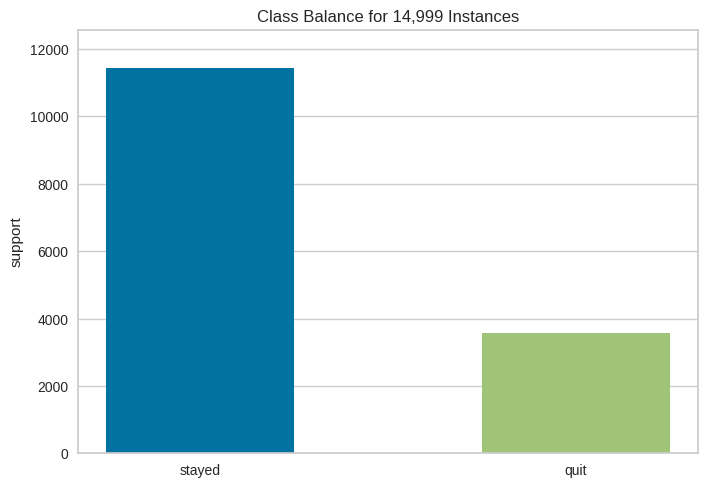

<Axes: title={'center': 'Class Balance for 14,999 Instances'}, ylabel='support'>

In [90]:
visualizer = ClassBalance(labels=['stayed', 'quit'])
visualizer.fit(employee_eval.quit)
visualizer.show()

In [92]:
X = employee_eval.loc[:, employee_eval.columns != 'quit']
y = employee_eval.quit

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)

## Build an Interactive Decision Tree Classifier

Supervised learning:
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$


- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$


About:

 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption

- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.


#### Decision trees: partitioning the feature space:

- Decision trees generally have low bias but have high variance.

In [94]:
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = DecisionTreeClassifier(random_state=0, criterion=crit, splitter=split, max_depth=depth,
                                     min_samples_split = min_split,  min_samples_leaf = min_leaf)

  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

  graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(employee_eval = graph.pipe(format='png')))

  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Build an Interactive Random Forest Classifier

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [104]:
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = RandomForestClassifier(random_state=1, criterion=crit, bootstrap=bootstrap,
                                     n_estimators=forests, max_depth=depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf,
                                     n_jobs= -1, verbose = False)
  estimator.fit(X_train, y_train)

  print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Random Forests Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]
  print('\Visualizing Tree: ', 0)


  graph = Source(tree.export_graphviz(num_tree, out_file = None, feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(employee_eval = graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance and Evaluation Metrics

In [109]:
# Define a custom color palette based on kats_palette
custom_palette = kats_palette.colors[1]

# Set the color cycle to use the custom palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

# Now you can use the custom palette in your plotting code
plt.rcParams['figure.figsize'] = (16, 12)


AttributeError: 'list' object has no attribute 'colors'

<Axes: title={'center': 'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

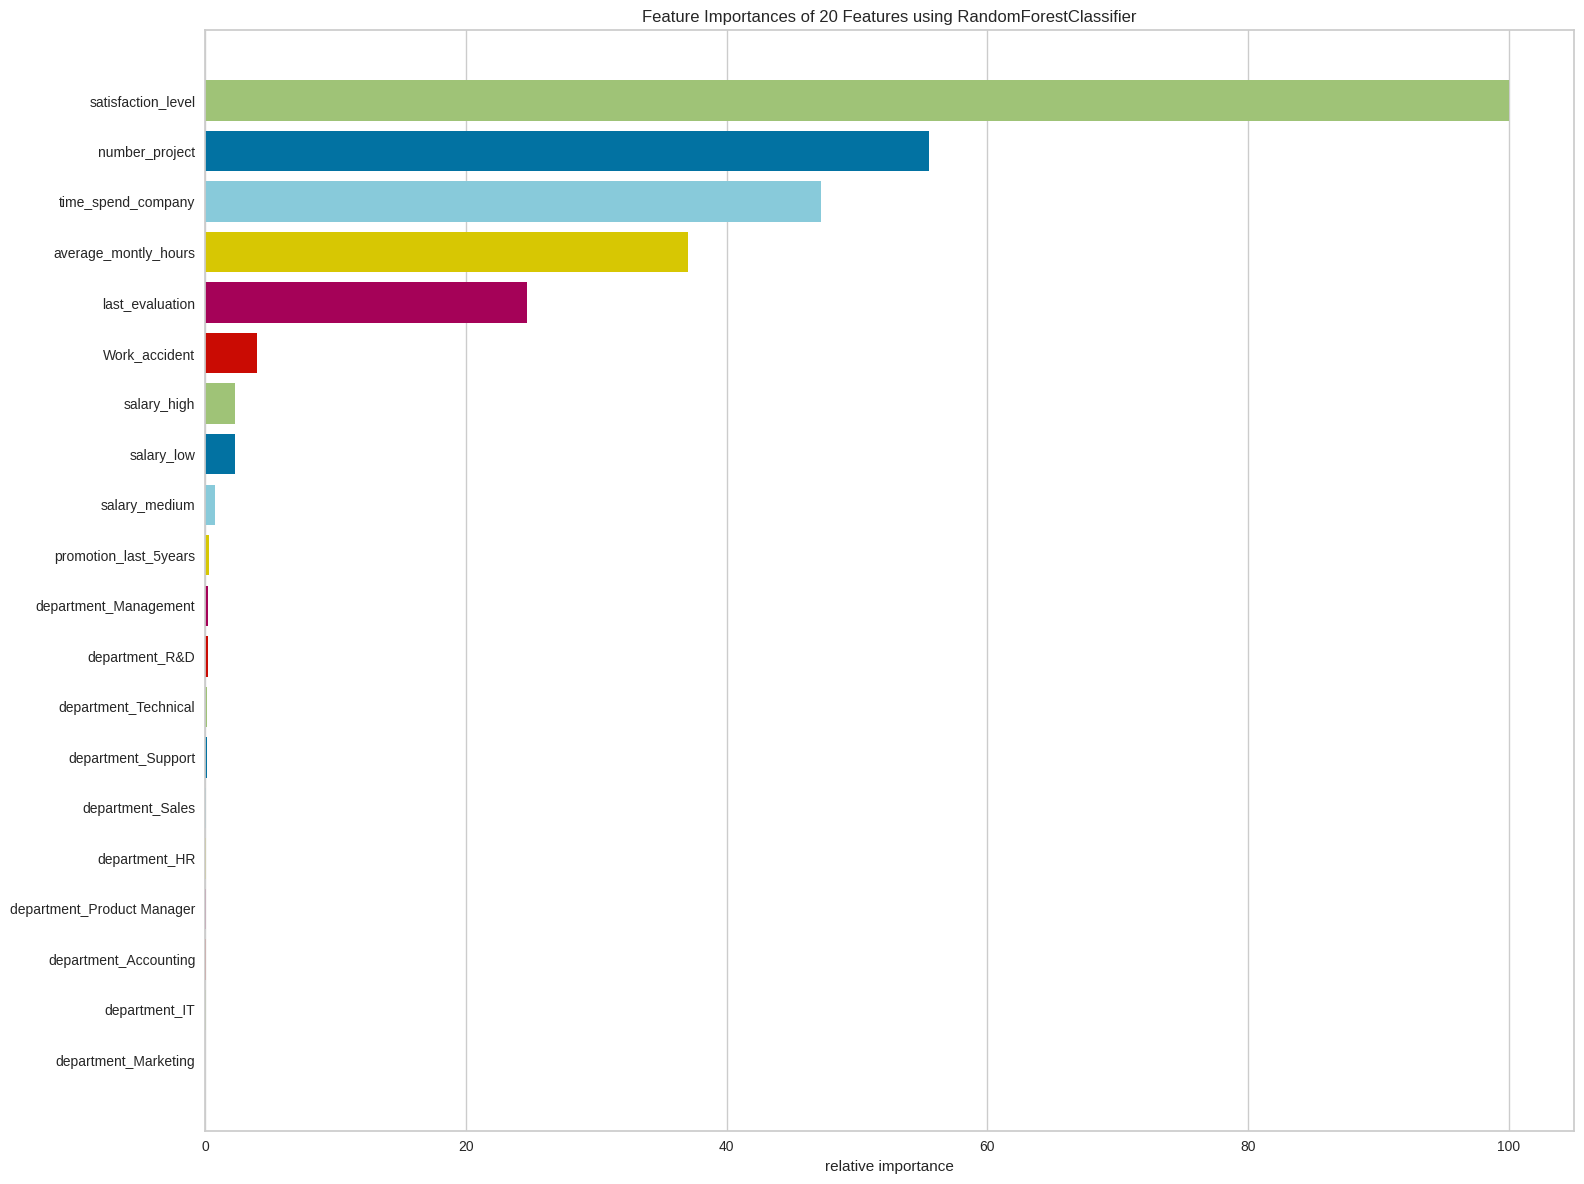

In [106]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(
    bootstrap=True,  # Corrected parameter
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=5,
    max_features='auto',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=-1,
    oob_score=False,
    random_state=1,
    warm_start=False
)

# Instantiate and fit the FeatureImportances visualizer
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)

# Show the feature importances plot and save it to a file
viz.show(outpath="1.png")

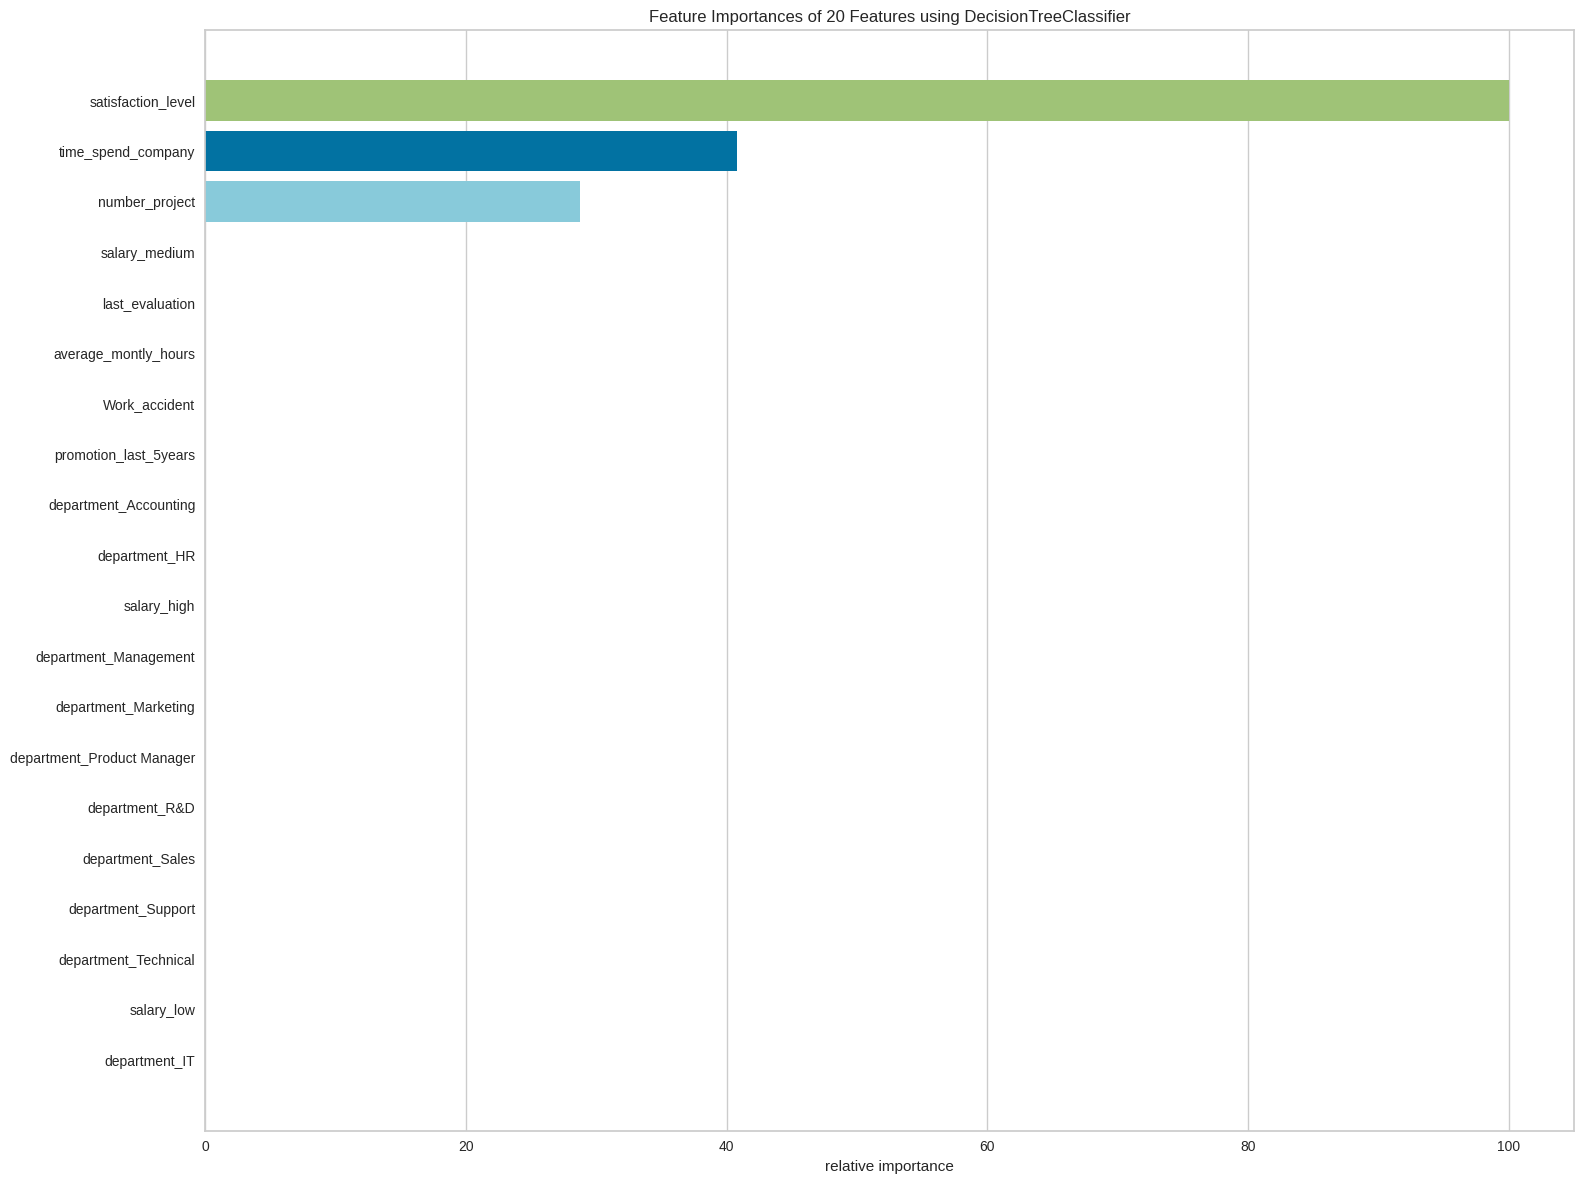

<Axes: title={'center': 'Feature Importances of 20 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [100]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()